In [1]:
# matplotlib rebuild
import matplotlib as mpl
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import yfinance as yf
import datetime

# mpl.font_manager._rebuild()

# matplotlib 환경 설정
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'Malgun Gothic' # window
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000


- USD/KRW 달러당 원화 환율
- USD/EUR 달러당 유로화 환율
- USD/JPY 달러당 엔화 환율
- CNY/KRW 위엔화 원화 환율
- EUR/USD 유로화 달러 환율
- USD/JPY 달러 엔화 환율
- JPY/KRW 엔화 원화 환율
- AUD/USD 오스트레일리아 달러 환율
- EUR/JPY 유로화 엔화 환율
- USD/RUB 달러 루블화

## 데이터 가져오기

### Treasury pandas core ndarray dataframe 형태

In [13]:
Treasury_list = ['^TNX','^TYX']
# commodity_symbol = "GC=F"  # Gold symbol
start_date = "2020-01-01"
end_date = "2023-06-27"

for tn in Treasury_list:
    data_treasury = yf.download(Treasury_list, start=start_date, end=end_date)['Close']
print(data_treasury.tail(10))

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
             ^TNX   ^TYX
Date                    
2023-06-12  3.765  3.907
2023-06-13  3.839  3.941
2023-06-14  3.796  3.881
2023-06-15  3.728  3.848
2023-06-16  3.769  3.855
2023-06-20  3.729  3.818
2023-06-21  3.723  3.808
2023-06-22  3.799  3.872
2023-06-23  3.739  3.821
2023-06-26  3.719  3.819


In [3]:
# etf_list = [
#   ['SOXX','SOXX'],
#   ['QQQ','QQQ'],
#   ['TQQQ','TQQQ'],
#   ['SPY','SPY'],
#   ['TLT','TLT'],
#   ['SOXL','SOXL']
# ] 

### ETF pandas core ndarray dataframe 

In [27]:
Etf_list = ['SOXX','SOXL','QQQ','TQQQ','SPY','TLT']
# commodity_symbol = "GC=F"  # Gold symbol
start_date = "2020-01-01"
end_date = "2023-06-27"

for etf in Etf_list:
    data_etf = yf.download(Etf_list, start=start_date, end=end_date)['Close']
print(data_etf)

[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed
                   QQQ       SOXL        SOXX         SPY         TLT  \
Date                                                                    
2020-01-02  216.160004  19.464001  256.290009  324.869995  137.009995   
2020-01-03  214.179993  18.412666  251.509995  322.410004  139.119995   
2020-01-06  215.559998  17.828667  248.889999  323.640015  138.330002   
2020-01-07  215.529999  18.747999  253.470001  322.730011  137.649994   
2020-01-08  217.149994  18.789333  253.240005  324.450012  136.740005   
...                ...        ...         ...         ...         ...   
20

### 개별 pandas core ndarray dataframe 병합

In [35]:
df_list = [data_etf, data_treasury]
merged_df = pd.concat(df_list, axis=1)
merged_df

,QQQ,SOXL,SOXX,SPY,TLT,TQQQ,^TNX,^TYX
Date,,,,,,,,
2020-01-02,216.160004,19.464001,256.290009,324.869995,137.009995,22.709999,1.882,2.341
2020-01-03,214.179993,18.412666,251.509995,322.410004,139.119995,22.092501,1.788,2.249
2020-01-06,215.559998,17.828667,248.889999,323.640015,138.330002,22.512501,1.811,2.281
2020-01-07,215.529999,18.747999,253.470001,322.730011,137.649994,22.485001,1.827,2.305
2020-01-08,217.149994,18.789333,253.240005,324.450012,136.740005,23.002501,1.874,2.358
...,...,...,...,...,...,...,...,...
2023-06-20,366.899994,24.650000,503.390015,437.179993,103.309998,40.599998,3.729,3.818
2023-06-21,361.899994,22.780001,491.119995,434.940002,103.559998,38.849998,3.723,3.808
2023-06-22,366.170013,23.100000,493.410004,436.510010,102.309998,40.139999,3.799,3.872


usdkrw = fdr.DataReader('USD/KRW', '2020')
usdkrw['Close'].tail()

usdeur = fdr.DataReader('USD/EUR', '2020')
usdeur['Close'].tail()

usdjpy = fdr.DataReader('USD/JPY', '2020')
usdjpy['Close'].tail()

eurjpy = fdr.DataReader('EUR/JPY', '2020')
eurjpy['Close'].tail()

usdgbp = fdr.DataReader('USD/GBP', '2020')
usdgbp['Close'].tail()

## 데이터 시각화

<Axes: xlabel='Date'>

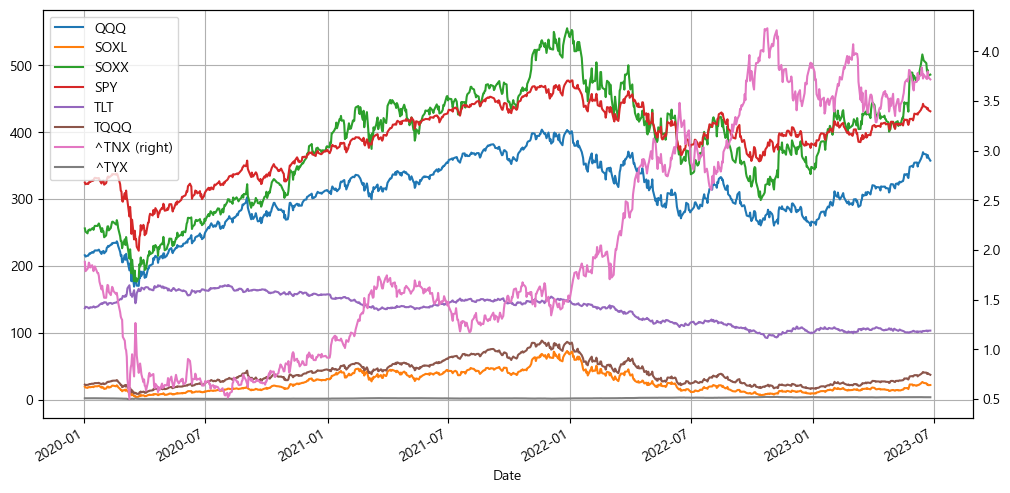

In [39]:
merged_df.plot(secondary_y=['^TNX'])

## y 보조축 만들기

In [ ]:
df[['SOXL', 'TQQQ']].plot(secondary_y=['TQQQ'])

## 비교를 위해 데이터 정규화
- 전체 데이터를 첫번째 row로 나누고 -1.0

In [ ]:
df2 = df[['LG화학', '삼성전자']]

df_plot = df2 / df2.iloc[0] - 1.0
df_plot.plot()

## 여러 종목 정규화 및 비교 차트

<Axes: xlabel='Date'>

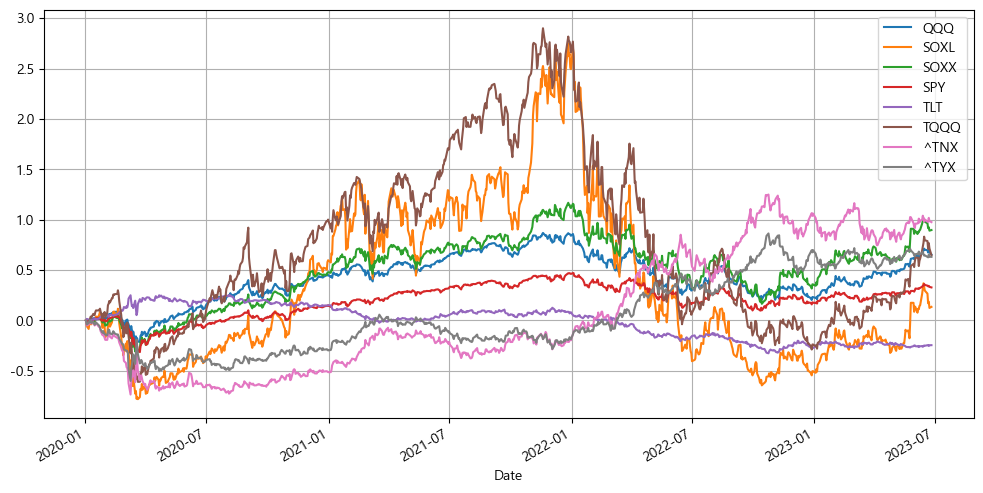

In [41]:
merged_df_norm = merged_df / merged_df.iloc[0] - 1
merged_df_norm.plot()

In [42]:
merged_df_norm.iloc[-1].sort_values(ascending=False)

^TNX    0.976089
SOXX    0.897421
QQQ     0.654700
TQQQ    0.647292
^TYX    0.631354
SPY     0.328039
SOXL    0.134916
TLT    -0.245019
Name: 2023-06-26 00:00:00, dtype: float64

## 회귀분석 하기
### TLT / SOXL
- 상관관계를 분석해서 업종 지수에 대한 비교 및 특정 종목이 따라가지 못 하는 경우 내.외부 요인 판단 가능

In [43]:
from sklearn.linear_model import LinearRegression #sklearn 싸이킷런에서 회귀모델을 가져오겠다.
import numpy as np

In [74]:
X = merged_df.iloc[:,np.ravel(3)].values # SOXL
y = merged_df.iloc[:,-2].values # ^TNX
X,y
# len(X), len(y)

(array([[324.86999512],
        [322.41000366],
        [323.64001465],
        [322.73001099],
        [324.45001221],
        [326.6499939 ],
        [325.70999146],
        [327.95001221],
        [327.45001221],
        [328.19000244],
        [330.92001343],
        [331.95001221],
        [331.29998779],
        [331.33999634],
        [331.72000122],
        [328.76998901],
        [323.5       ],
        [326.89001465],
        [326.61999512],
        [327.67999268],
        [321.73001099],
        [324.11999512],
        [329.05999756],
        [332.85998535],
        [333.98001099],
        [332.20001221],
        [334.67999268],
        [335.26000977],
        [337.42001343],
        [337.05999756],
        [337.6000061 ],
        [336.73001099],
        [338.33999634],
        [336.95001221],
        [333.48001099],
        [322.42001343],
        [312.6499939 ],
        [311.5       ],
        [297.51000977],
        [296.26000977],
        [309.08999634],
        [300.239

In [75]:
reg = LinearRegression() # 객체 생성
reg.fit(X,y) # fit이 학습모델 -> 학습하면서 모델생성

LinearRegression()

In [76]:
y_pred = reg.predict(X) # X에 대한 예측 값
y_pred

array([1.50104122, 1.48127201, 1.49115674, 1.48384368, 1.49766611,
       1.51534581, 1.50779167, 1.52579313, 1.52177499, 1.52772176,
       1.54966093, 1.5579383 , 1.55271451, 1.55303603, 1.55608986,
       1.5323827 , 1.49003154, 1.51727468, 1.51510473, 1.52362318,
       1.47580739, 1.495014  , 1.5347133 , 1.5652511 , 1.57425196,
       1.55994737, 1.57987721, 1.5845384 , 1.60189682, 1.59900363,
       1.60334329, 1.59635176, 1.60929007, 1.59811975, 1.57023381,
       1.48135245, 1.40283773, 1.39359604, 1.28116841, 1.27112305,
       1.37422855, 1.30310733, 1.40452528, 1.3209479 , 1.28076645,
       1.09408356, 1.20811855, 1.09512807, 0.88417555, 1.05462534,
       0.81779583, 0.92186578, 0.81900123, 0.82309969, 0.72899479,
       0.68198244, 0.84431549, 0.87356759, 0.9893707 , 0.92684824,
       0.99298688, 0.96164539, 0.86842437, 0.91407057, 0.88481847,
       1.01878331, 1.02095326, 1.0924762 , 1.12598765, 1.1055754 ,
       1.17091048, 1.12245166, 1.13322026, 1.19381396, 1.15323

In [77]:
X.shape, y.shape

((876, 1), (876,))

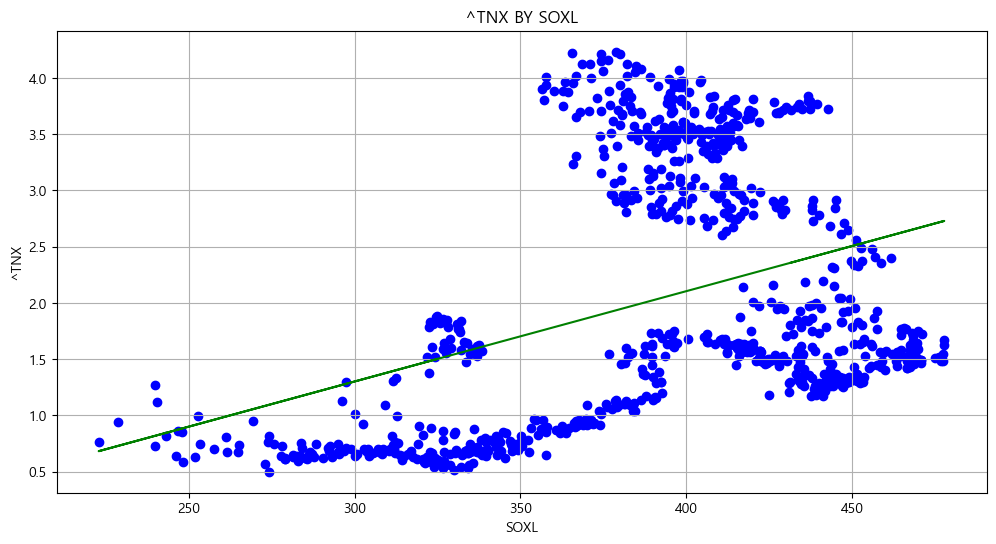

In [78]:
plt.scatter(X,y, color='blue') # 산점도 그래프 (실제 값 그래프)
plt.plot(X, y_pred, color='green')  # 선 그래프 (싸이킷런에서 회귀모델로 학습한 훟 예측한 그래프)
plt.title('^TNX BY SOXL')
plt.xlabel('SOXL')
plt.ylabel('^TNX')
plt.show()

In [79]:
print('SOXL에 따른 TNX 예측 값 :', reg.predict([[22]]))
# print('9,8,10시간 공부했을 때 예상 점수 :', reg.predict([[9],[8],[10]]))

SOXL에 따른 TNX 예측 값 : [-0.93291024]


In [80]:
reg.coef_, reg.intercept_

(array([0.00803629]), -1.1097086473739002)

## 데이터 세트 분리

In [81]:
from sklearn.model_selection import train_test_split  # 데이터 분리는 sklearn.moder_selection 이고 리니어는 sklearn.linear_modeol import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)  # 테스트 사이즈를 8:2로 하겠다 test_size = 0.2 random_state = 0 은 그냥 확인용

In [82]:
len(X_train), len(X_test)

(700, 176)

In [83]:
len(y_train), len(y_test)

(700, 176)

### 분리된 데이터를 통해 모델링

In [84]:
reg = LinearRegression()
reg.fit(X_train, y_train) # 훈련세트로 학습

LinearRegression()

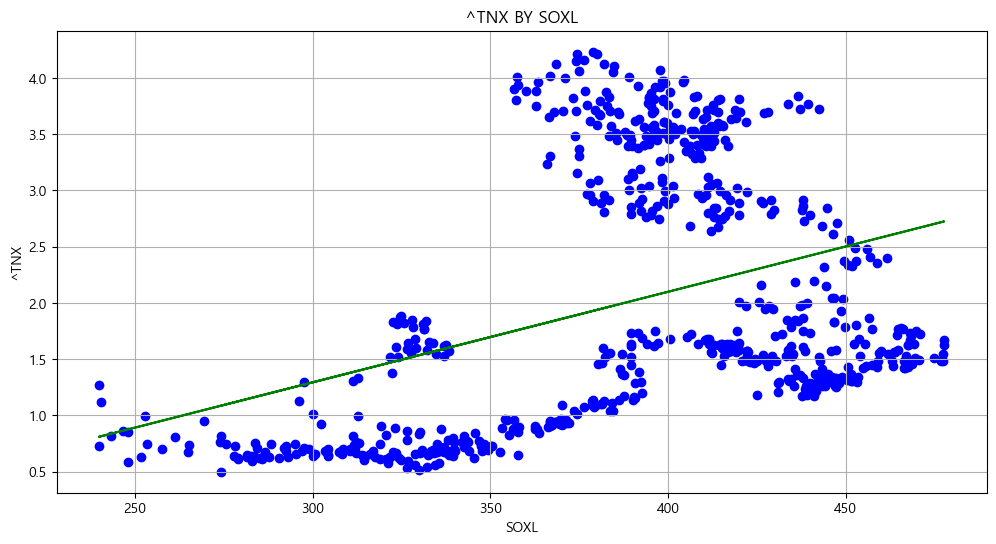

In [85]:
plt.scatter(X_train,y_train, color='blue') # 산점도 그래프 -> 실제 값?
plt.plot(X_train, reg.predict(X_train), color='green')  # 선 그래프  -> 예측 값?
plt.title('^TNX BY SOXL')
plt.xlabel('SOXL')
plt.ylabel('^TNX')
plt.show()

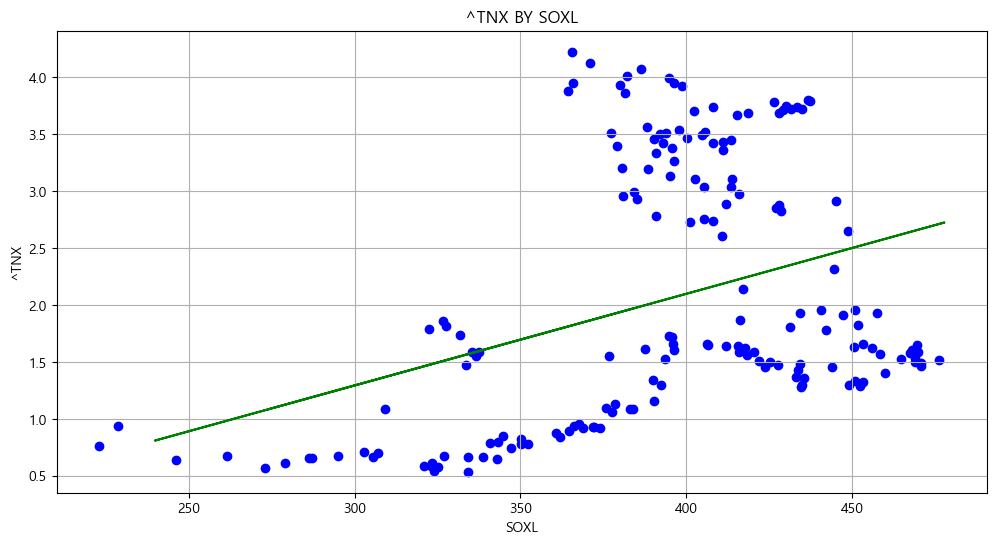

In [86]:
plt.scatter(X_test,y_test, color='blue') # 산점도 그래프
plt.plot(X_train, reg.predict(X_train), color='green')  # 선 그래프 
plt.title('^TNX BY SOXL')
plt.xlabel('SOXL')
plt.ylabel('^TNX')
plt.show()

In [87]:
reg.coef_, reg.intercept_

(array([0.00805528]), -1.1228289651855439)

### 모델평가

In [88]:
reg.score(X_train, y_train)

0.13869202529374958

In [89]:
reg.score(X_test, y_test)

0.1277281996791354

### 경사하강법

In [ ]:
from sklearn.linear_model import SGDRegressor # SGF 확률적 경사하강법 
#지수 표기법
#1e-3 = 0.001 10^-3
#1e-4 = 0.0001 10^-4
#1e+3 = 1000 10^3
#1e+4 = 10000 10^4


# sr = SGDRegressor()
sr = SGDRegressor(max_iter=1000, eta0=1e-4, random_state=0, verbose=1)  #에포크 방식
sr.fit(X_train, y_train)

In [ ]:
plt.scatter(X_test,y_test, color='blue') # 산점도 그래프
plt.plot(X_train, sr.predict(X_train), color='green')  # 선 그래프 
plt.title('하이닉스 BY 삼성전자(train data)')
plt.xlabel('삼성전자')
plt.ylabel('하이닉스')
plt.show()

In [ ]:
sr.coef_, sr.intercept_

In [ ]:
sr.score(X_test, y_test) # 테스트 세트를 통한 모델평가

In [ ]:
sr.score(X_train, y_train) # 룬련 세트를 통한 모델평가

In [ ]:
pip install pandas-datareader

In [ ]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import yfinance as yf
import datetime

commodity_symbol = "GC=F"  # Gold symbol
start_date = "2023-01-01"
end_date = "2023-06-27"

data = yf.download(commodity_symbol, start=start_date, end=end_date)
print(data.tail(10))